In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.cm as cm
import cartopy.mpl.ticker as cticker

import pickle

import os
    
plotdir = './plots/precip/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)  
datadir = '../data/'    
if not os.path.exists(datadir):
    os.makedirs(datadir)     

In [2]:
# THIS STEP IS ONLY NECESSARY IF PICKLE IS NOT USED!!

data = {}
lat = {}
lon = {}

# Define the list of experiments and variables
array_exp = ["METEOSAT","i3yp","i3yu"]
array_var = ["precip"]

tstep = 95

for e in range(len(array_exp)):
        print(e)
        
        if array_exp[e] != "METEOSAT":
            infile = f"/perm/natb/48r1/sensitivity/hres_{array_exp[e]}_2D_satellite_simulator_3hourly_remap0.1deg_tropics.nc"
            filP = xr.open_dataset(infile)
            in_data = filP.variables['clbt']
            data[e] = in_data[tstep, :, :]
            lon[e]=np.linspace(0,359.9,3600)
            lat[e]=np.linspace(-30,30,601)

        else:    
            file=f'/scratch/pah/MSG1_SEVIRI_IR_108_202001312115.nc'
            data[e] = xr.open_dataset(file,engine='netcdf4')['tb'].load()
            lat[e] = xr.open_dataset(file,engine='netcdf4')['lat'].load()
            lon[e] = xr.open_dataset(file,engine='netcdf4')['lon'].load()    
            
# WRITE PICKLE

# Open a file and use dump()
with open(datadir + 'map_brightness_temperature_tstep_NextGEMS_Cycle3_IndianOcean.pickle', 'wb') as file:
      
    # A new file will be created
    pickle.dump([data,lon,lat], file)               

0
1
2


In [2]:
# CONTINUE HERE IF PICKLE IS USED

with open(datadir + 'map_brightness_temperature_tstep_NextGEMS_Cycle3_IndianOcean.pickle', 'rb') as file:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data,lon,lat = pickle.load(file)

0
1
2


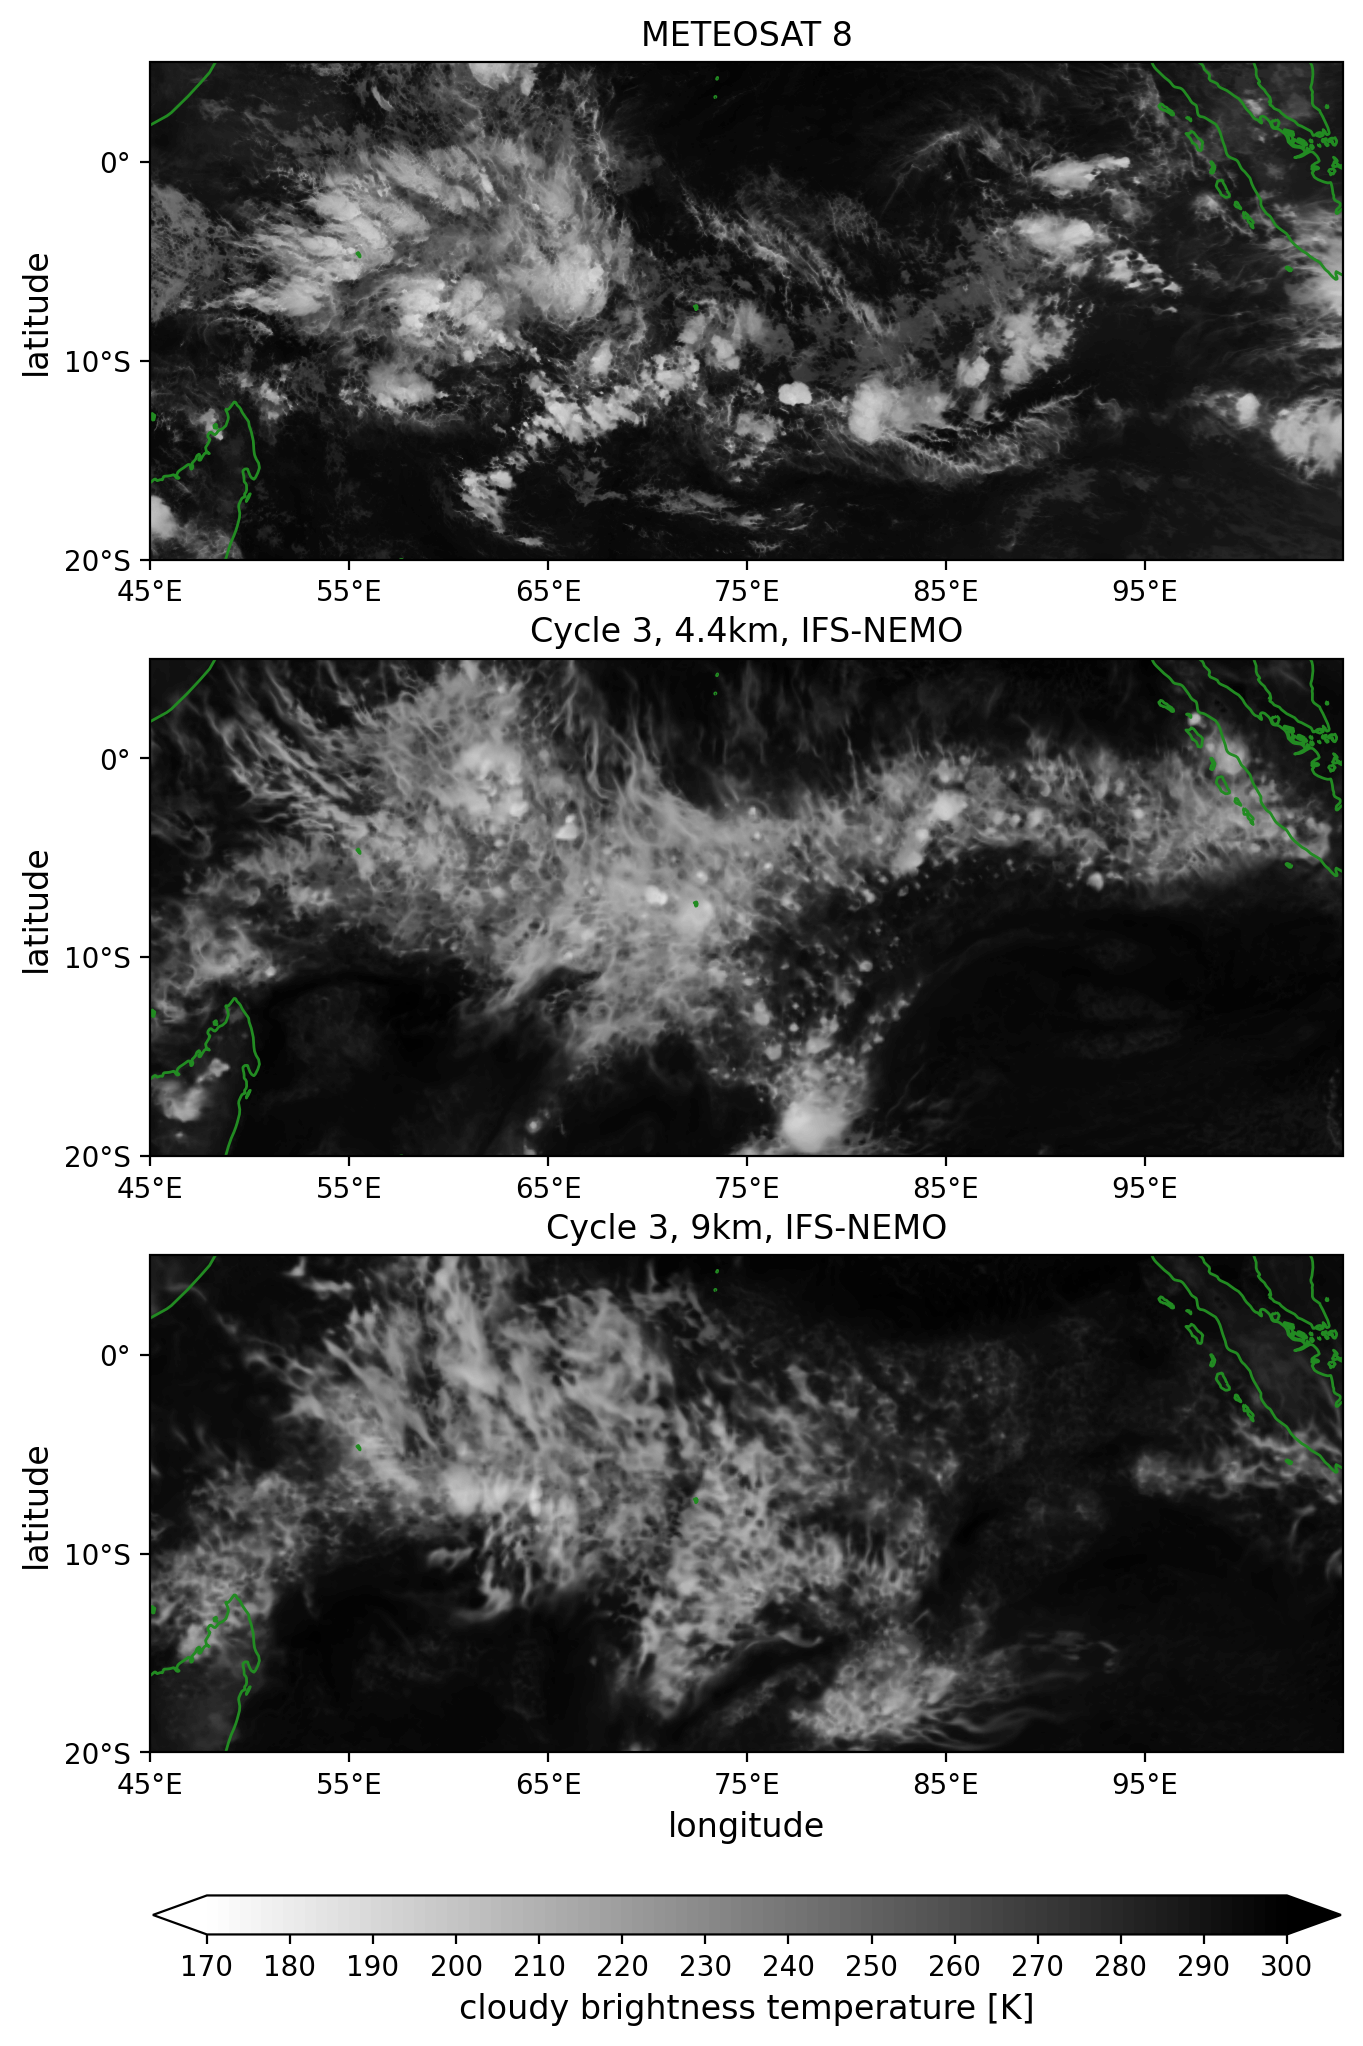

In [3]:
min_lon = 45
min_lat = -20
max_lon = 105
max_lat = 5

array_exp = ["METEOSAT","i3yp","i3yu"]

# Define title strings
Title = ["METEOSAT 8","Cycle 3, 4.4km, IFS-NEMO","Cycle 3, 9km, IFS-NEMO"] 

fig, ax = plt.subplots(nrows=3,ncols=1,dpi=200,subplot_kw={'projection':ccrs.PlateCarree()},figsize=(9,13))
axes = ax.flatten()

for e in range(len(array_exp)):
        print(e)
        
        extent = [min_lon, max_lon, min_lat, max_lat] 
        axes[e].set_extent(extent, crs=ccrs.PlateCarree()) 
        
        if array_exp[e] != "METEOSAT":
            cnf = axes[e].contourf(lon[e],lat[e],data[e],transform = ccrs.PlateCarree(),cmap=plt.cm.binary,extend='both',levels = np.linspace(170,300,100))
        else:    
            cnf = axes[e].tricontourf(lon[e],lat[e],data[e],cmap=plt.cm.binary,extend='both',levels = np.linspace(170,300,100))

    
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.2)
cbar1_ax = fig.add_axes([0.17, 0.18, 0.66, 0.015],autoscalex_on=True)
#cbar2_ax = fig.add_axes([0.92, 0.15, 0.01, 0.3])
cbar1=fig.colorbar(cnf, cax=cbar1_ax,orientation='horizontal',ticks=np.linspace(170,300,14))
cbar1.set_label('cloudy brightness temperature [K]',fontsize=12)

#cbar2=fig.colorbar(p2, cax=cbar2_ax,orientation='vertical')
for ie in range(len(axes)):
    axes[ie].coastlines(color='forestgreen')
    axes[ie].set_xticks(np.arange(min_lon,max_lon,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axes[ie].xaxis.set_major_formatter(lon_formatter)

    axes[ie].set_yticks(np.arange(min_lat,max_lat,10), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axes[ie].yaxis.set_major_formatter(lat_formatter)
    axes[ie].set_title(Title[ie])
    
    axes[ie].set_ylabel('latitude',fontsize=12)
axes[len(axes)-1].set_xlabel('longitude',fontsize=12)              

plt.savefig(plotdir + f'map_brightness_temperature_tstep_NextGEMS_Cycle3_IndianOcean_remap0.1deg_3hourly_overview_paper.png')